In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler 

In [4]:
df = pd.read_csv("../data/clean_one_hot_emp_data.csv")
df.drop(df.columns[0], axis=1,inplace=True)

In [5]:
df.head()

,age,attrition,business_travel,daily_rate,distance_from_home,education,environment_satisfaction,gender,hourly_rate,job_involvement,...,job_role_sales representative,department_research & development,department_sales,education_field_life sciences,education_field_marketing,education_field_medical,education_field_other,education_field_technical degree,marital_status_married,marital_status_single
0,41,1,1,1102,1,2,2,0,94,3,...,0,0,1,1,0,0,0,0,0,1
1,49,0,2,279,8,1,3,1,61,2,...,0,1,0,1,0,0,0,0,1,0
2,37,1,1,1373,2,2,4,1,92,2,...,0,1,0,0,0,0,1,0,0,1
3,33,0,2,1392,3,4,4,0,56,3,...,0,1,0,1,0,0,0,0,1,0
4,27,0,1,591,2,1,1,1,40,3,...,0,1,0,0,0,1,0,0,1,0


In [6]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [7]:
y = df.attrition
X = df.drop('attrition',axis=1)

In [32]:
X.columns

Index(['age', 'business_travel', 'daily_rate', 'distance_from_home',
       'education', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_level', 'job_satisfaction', 'monthly_income',
       'monthly_rate', 'num_companies_worked', 'over_time',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager',
       'job_role_human resources', 'job_role_laboratory technician',
       'job_role_manager', 'job_role_manufacturing director',
       'job_role_research director', 'job_role_research scientist',
       'job_role_sales executive', 'job_role_sales representative',
       'department_research & development', 'department_sales',
       'education_field_life sciences', 'education_field_marketing',
       'educatio

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [9]:
reg = Lasso(alpha=0.5)
reg.fit(X_train, y_train)

Lasso(alpha=0.5)

In [10]:
print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

Lasso Regression: R^2 score on training set 3.0763355299385675
Lasso Regression: R^2 score on test set 0.6640708168101028


In [11]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

In [12]:
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

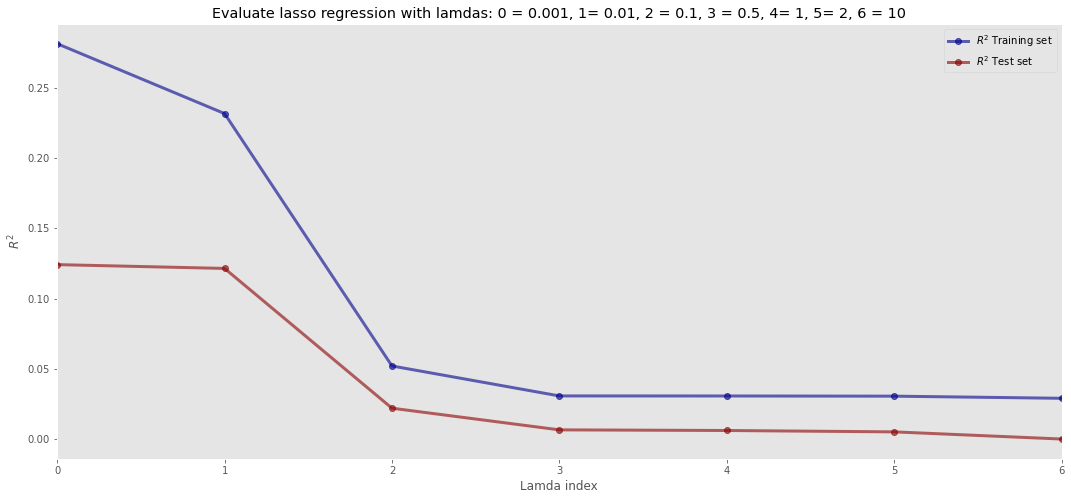

In [13]:
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

In [14]:
from sklearn.metrics import mean_squared_error
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    12.411391
lambda        0.001000
Name: 0, dtype: float64

In [15]:
# Coefficients of best model
reg_best = Lasso(alpha = 0.001)
reg_best.fit(X_train, y_train)
reg_best.coef_

array([-3.00107822e-03,  7.24552773e-02, -2.23004186e-05,  3.07720905e-03,
        5.91534024e-03, -3.86228622e-02,  3.55324233e-02, -7.04078300e-05,
       -5.36879349e-02, -5.29587994e-03, -3.62214367e-02, -4.09042157e-08,
        5.76982270e-07,  2.11448297e-02,  2.27774249e-01, -1.53463567e-04,
       -0.00000000e+00, -1.50175867e-02, -1.59680911e-02, -5.42086237e-03,
       -8.85949633e-03, -2.27703220e-02,  8.88020665e-03, -1.31176213e-02,
        9.42967301e-03, -9.36126709e-03,  3.22877633e-02,  1.22897816e-01,
        0.00000000e+00,  0.00000000e+00, -1.42832235e-03,  1.10339794e-02,
        0.00000000e+00,  1.48400609e-01, -5.66309740e-02,  0.00000000e+00,
       -3.83232408e-02,  0.00000000e+00, -4.16589793e-02, -4.16317937e-02,
        5.90415307e-02,  8.70209313e-03,  1.26611316e-01])

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg_best.predict(X_test))

0.09934435799441058

In [17]:
l_min = 0.001
l_max = 0.1
l_num = 20
lambdas = np.linspace(l_min,l_max, l_num)

train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

pred_num = X.shape[1]
coeff_a = np.zeros((l_num, pred_num))

In [18]:
list(lambdas.round(3))

[0.001,
 0.006,
 0.011,
 0.017,
 0.022,
 0.027,
 0.032,
 0.037,
 0.043,
 0.048,
 0.053,
 0.058,
 0.064,
 0.069,
 0.074,
 0.079,
 0.084,
 0.09,
 0.095,
 0.1]

In [19]:
from sklearn.model_selection import cross_val_score

for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)
    results = cross_val_score(reg, X, y, cv=5, scoring="r2")

    train_r_squared[ind] = reg.score(X_train, y_train)    
    test_r_squared[ind] = reg.score(X_test, y_test)

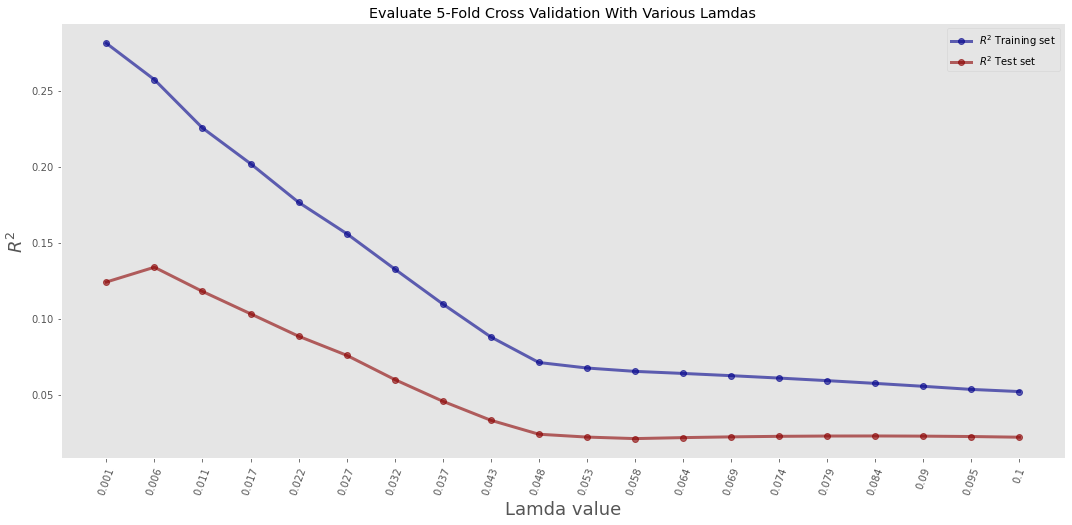

In [20]:
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda value', fontsize=18)
plt.ylabel(r'$R^2$', fontsize=18)

plt.xticks(np.arange(20),('0.001','0.006','0.011','0.017','0.022','0.027','0.032','0.037',
                         '0.043','0.048','0.053','0.058','0.064','0.069','0.074','0.079',
                         '0.084','0.09','0.095','0.1'))
plt.xticks(rotation=70)
plt.title(r'Evaluate 5-Fold Cross Validation With Various Lamdas')
plt.legend(loc='best')
plt.grid()

In [21]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    13.384780
lambda        0.006211
Name: 1, dtype: float64

In [22]:
# Best Model
reg_best = Lasso(alpha = 0.006211)
reg_best.fit(X_train, y_train)

Lasso(alpha=0.006211)

In [23]:
mean_squared_error(y_test, reg_best.predict(X_test))

0.09824045384578609

In [24]:
print(reg_best.coef_)

[-3.10169169e-03  5.40489196e-02 -2.53085449e-05  3.01146073e-03
  0.00000000e+00 -3.34524989e-02  9.82222517e-03 -8.09768728e-05
 -4.51083251e-02 -0.00000000e+00 -3.29033092e-02 -4.77666000e-06
  3.99970131e-07  1.91702857e-02  1.97274574e-01 -3.55109428e-05
 -0.00000000e+00 -9.35553216e-03 -2.19411507e-02 -4.65823732e-03
 -6.05083918e-03 -1.02759961e-02  7.43159129e-03 -1.30716608e-02
  9.08899795e-03 -8.98468975e-03  0.00000000e+00  4.95549020e-02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  4.90048263e-02 -4.54401010e-02  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  2.27332271e-02 -0.00000000e+00  8.95400119e-02]


In [25]:
coeff_list = list(zip(reg_best.coef_, df.columns))

In [26]:
coeff_list

[(-0.003101691693413717, 'age'),
 (0.0540489195614885, 'attrition'),
 (-2.5308544858479724e-05, 'business_travel'),
 (0.0030114607272377085, 'daily_rate'),
 (0.0, 'distance_from_home'),
 (-0.03345249886607443, 'education'),
 (0.00982222516989057, 'environment_satisfaction'),
 (-8.097687280267609e-05, 'gender'),
 (-0.04510832512717466, 'hourly_rate'),
 (-0.0, 'job_involvement'),
 (-0.03290330919387847, 'job_level'),
 (-4.7766600016740515e-06, 'job_satisfaction'),
 (3.999701305115233e-07, 'monthly_income'),
 (0.01917028567711938, 'monthly_rate'),
 (0.19727457381123303, 'num_companies_worked'),
 (-3.5510942820675336e-05, 'over_time'),
 (-0.0, 'percent_salary_hike'),
 (-0.009355532161955869, 'performance_rating'),
 (-0.02194115074341849, 'relationship_satisfaction'),
 (-0.004658237320498423, 'stock_option_level'),
 (-0.006050839179876658, 'total_working_years'),
 (-0.010275996141766377, 'training_times_last_year'),
 (0.007431591290527347, 'work_life_balance'),
 (-0.013071660757476676, 'yea

In [28]:
sorted(coeff_list)

[(-0.04544010099672829, 'job_role_sales representative'),
 (-0.04510832512717466, 'hourly_rate'),
 (-0.03345249886607443, 'education'),
 (-0.03290330919387847, 'job_level'),
 (-0.02194115074341849, 'relationship_satisfaction'),
 (-0.013071660757476676, 'years_at_company'),
 (-0.010275996141766377, 'training_times_last_year'),
 (-0.009355532161955869, 'performance_rating'),
 (-0.00898468974766579, 'years_since_last_promotion'),
 (-0.006050839179876658, 'total_working_years'),
 (-0.004658237320498423, 'stock_option_level'),
 (-0.003101691693413717, 'age'),
 (-8.097687280267609e-05, 'gender'),
 (-3.5510942820675336e-05, 'over_time'),
 (-2.5308544858479724e-05, 'business_travel'),
 (-4.7766600016740515e-06, 'job_satisfaction'),
 (0.0, 'department_research & development'),
 (-0.0, 'department_sales'),
 (0.0, 'distance_from_home'),
 (0.0, 'education_field_life sciences'),
 (-0.0, 'education_field_marketing'),
 (-0.0, 'education_field_medical'),
 (-0.0, 'education_field_technical degree'),
 (

In [31]:
np.exp(0.19727457381123303)

1.2180784472358082

In [33]:
prob = 1.2180784472358082/(1+1.2180784472358082)

In [34]:
prob

0.549159317946482

In [35]:
log_odd_coeff_list = np.exp(coeff_list)

TypeError: ufunc 'exp' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''